# Vyhodnocení tlakové zkoušky na betonových krychlích

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [3]:
%matplotlib inline

### Načtení dat

- načtěte data ze souboru tlakova_zkouska-data.txt - pomocí numpy

In [5]:
f_cube = XXX
f_cube

array([[31.1, 26.1, 33.5, 30.9, 29.7, 31.3, 22.1, 34. , 34.8, 41.6],
       [30.4, 31. , 31.9, 39.5, 32.8, 28.1, 32.5, 33.6, 30.7, 35.6],
       [30.4, 36.5, 32.6, 33.9, 25.2, 37.1, 25.6, 34.1, 34.6, 29.7],
       [29.3, 31.7, 34. , 29.5, 29.5, 32.4, 32. , 24.5, 24.2, 29.6],
       [34.4, 32. , 31.1, 33.7, 35. , 35.5, 33.2, 30.9, 35.8, 38.1],
       [30.5, 30.8, 36.4, 27.8, 30.1, 27.4, 34.1, 26.7, 24.1, 34.6],
       [33.7, 32.6, 31.8, 25.8, 35.1, 30. , 33.6, 36.4, 34.3, 32.1],
       [32.3, 26.9, 24.9, 28.1, 33.8, 30.8, 35.3, 29.7, 32.7, 31.2],
       [30.1, 32.6, 36.4, 31.4, 33.8, 37. , 38.9, 29.6, 30.1, 29.7],
       [28.6, 38.5, 28.7, 25.6, 31.8, 26.7, 29.2, 36.6, 37. , 27.3]])

### Stanovení charakteristik souboru naměřených hodnot
- využijte funkce balíčku numpy případně scipy.stats

In [4]:
width = 8
print('{:>{width}} = {: d}'.format('n', XXX, width=width)) # velikost souboru dat
print('{:>{width}} = {: .1f}'.format('min', XXX, width=width))
print('{:>{width}} = {: .1f}'.format('max', XXX, width=width))
print('{:>{width}} = {: .3f}'.format('mu', XXX, width=width))
print('{:>{width}} = {: .3f}'.format('std', XXX, width=width)) # Excel - smodch.vyber
print('{:>{width}} = {: .6f}'.format('skew', XXX, width=width)) # šikmost
print('{:>{width}} = {: .6f}'.format('kurtosis', XXX, width=width)) # špičatost
print('{:>{width}} = {: .2f} %'.format('CoV', XXX * 100, width=width)) # variační koeficient

       n =  100
     min =  22.1
     max =  41.6
      mu =  31.705
     std =  3.770
    skew = -0.094538
kurtosis = -0.140057
     CoV =  11.83 %


### Aproximace pomocí známých hustot pravděpodobnosti
- nafitujte parametry normálního, lognormálního dvou parametrického (loc=0) a weibulova dvou parametrického rozdělení (loc=0) na naměřená data

In [5]:
params = stats.norm.fit(f_cube)
rv_norm = stats.norm(*params)
print('params =', params)
print('mu, std =', rv_norm.mean(), rv_norm.std())

params = (31.705, 3.7511698175369244)
mu, std = 31.705 3.7511698175369244


In [6]:
params = XXX
rv_lognorm = XXX
print('params =', params)
print('mu, std =', rv_lognorm.mean(), rv_lognorm.std())

params = (0.12102468381267445, 0.0, 31.47761020411158)
mu, std = 31.708982265721623 3.851664722157557


In [7]:
params = XXX
rv_weib = XXX
print('params =', params)
print('mu, std =', rv_weib.mean(), rv_weib.std())

params = (9.229216368943419, 0, 33.36086954302854)
mu, std = 31.627341745240383 4.1039050900775


### Grafické zobrazení hustot
- vykreslete normovaný histogram - počet sloupečků je $sqrt{n}$
    - sloupečky mají průhlednost 50 % a barva hranice je černá
- vykreslete nafitovaná rozdělení

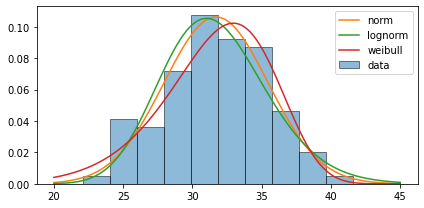

In [8]:
fig, ax = plt.subplots(figsize=(6,3), tight_layout=True)
ax.hist(f_cube, XXX, XXX, XXX, label='data', XXX)

x = np.linspace(20, 45, 100)
ax.plot(x, XXX, label='norm')

ax.plot(x, XXX, label='lognorm')

ax.plot(x, XXX, label='weibull')

ax.legend();

### Grafické zobrazení distribučních funkcí

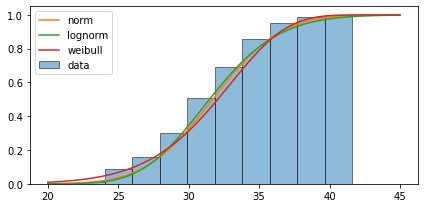

In [9]:
fig, ax = plt.subplots(figsize=(6,3), tight_layout=True)
# kopie předchozího a změna na distribuční funkce

### Výpočet kvantilů
- funkce pro tisk vybraných kvantilů náhodné veličiny (percent point function)

In [10]:
def print_quantils(rv, name):
    print(name)
    print('\tf_0.05  =', XXX)
    print('\tf_0.95  =', XXX)
    print('\tf_0.001 =', XXX)
print_quantils(rv_norm, 'rv_norm')
print_quantils(rv_lognorm, 'rv_lognorm')
print_quantils(rv_weib, 'rv_weib')

rv_norm
	f_0.05  = 25.534874720313493
	f_0.95  = 37.8751252796865
	f_0.001 = 20.113013843925774
rv_lognorm
	f_0.05  = 25.795720751131043
	f_0.95  = 38.41101994091577
	f_0.001 = 21.655990598220484
rv_weib
	f_0.05  = 24.180786003431493
	f_0.95  = 37.572250185559724
	f_0.001 = 15.78360548445582
